In [1]:
from generate_ftw_rom import get_ftws
from generate_waveform_rom import get_waveform_rom
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft

clock_frequency = 1e8
sampling_frequency = 48828
pwm_frequency = clock_frequency
phase_update_freq = clock_frequency
phase_bits = 32
address_bits = 17
sample_bits = 11
amplitude = 0.4

ftws = get_ftws(phase_bits, pwm_frequency)
waveform_rom = get_waveform_rom(address_bits, sample_bits)

In [2]:
# uses global params
def to_signed(value, bits):
    if value >= 2**(bits-1):
        return value - 2**bits
    return value
    
def dds_generate_phases(note_number, sampling_frequency, total_time):
    phase_register = 0
    ftw = ftws[note_number]
    
    values = []
    phase_updates_per_sample = int(phase_update_freq/sampling_frequency)
    total_steps = int(total_time*phase_update_freq)
    for i in range(0, total_steps):
        if i % phase_updates_per_sample == 0:
            values.append(phase_register)
        phase_register = (phase_register + ftw) % 2**phase_bits

    ts = np.arange(0, total_time, 1/sampling_frequency)
    lmin = min(len(ts), len(values))
    return ts[:lmin], values[:lmin]

In [3]:
def note_number_to_freq(note_number):
    s = 2**(1/12)
    return 440 * s**(note_number-69)

def plot_dds_phase_error(note_number, sampling_frequency, total_time=None):
    if total_time is None:
        total_time = 1/freq * 3
    ts, ys = dds_generate_phases(note_number, sampling_frequency, total_time)
    phase_error = np.remainder(ys, 2**(phase_bits-address_bits))
    fig = plt.figure()
    ax1 = fig.add_subplot()
    ax1.set_ylabel('Phase error')
    ax1.set_xlabel('time')
    ax1.set_title('Phase truncation error')
    plt.plot(ts, phase_error)
    return fig


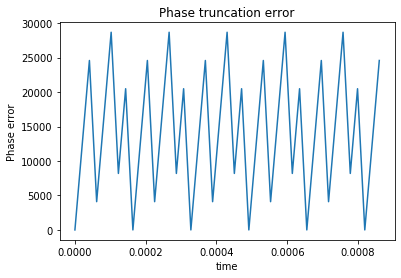

In [4]:
number = 90
total_time = 1.3/note_number_to_freq(number)
fig = plot_dds_phase_error(70, sampling_frequency, total_time=total_time)


In [5]:
fig.savefig('phase_truncation_error.eps')

In [6]:
print(ftws[number])

63565
